In [1]:
project_root = None

In [2]:
from pathlib import Path
import sys
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if project_root is None:
    PROJECT_ROOT = Path.cwd().parent
else:
    PROJECT_ROOT = Path(project_root)
    
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))
    
from src.data.loader import DataLoader

sns.set(style="whitegrid")

with open(PROJECT_ROOT / "configs" / "params.yaml") as f:
    cfg = yaml.safe_load(f)

DATA_PATH = PROJECT_ROOT / cfg["paths"]["raw_data"]


In [3]:
df = DataLoader(DATA_PATH).load()
df.head()


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
df.shape

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]


YearsWithCurrManager    0.038514
dtype: float64

In [6]:
FIG_DIR = PROJECT_ROOT / "outputs" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

sns.set(style="whitegrid")

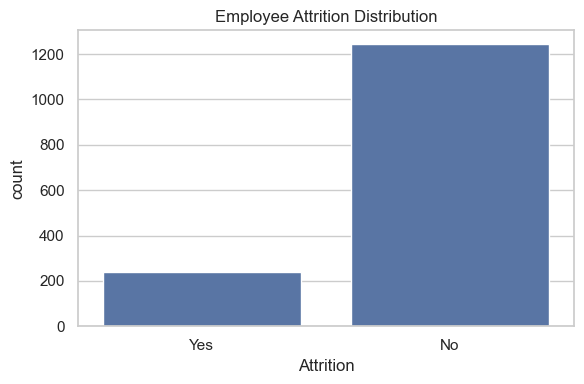

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Distribution")
plt.tight_layout()

plt.savefig(FIG_DIR / "eda_attrition_distribution.png")
plt.show()
plt.close()


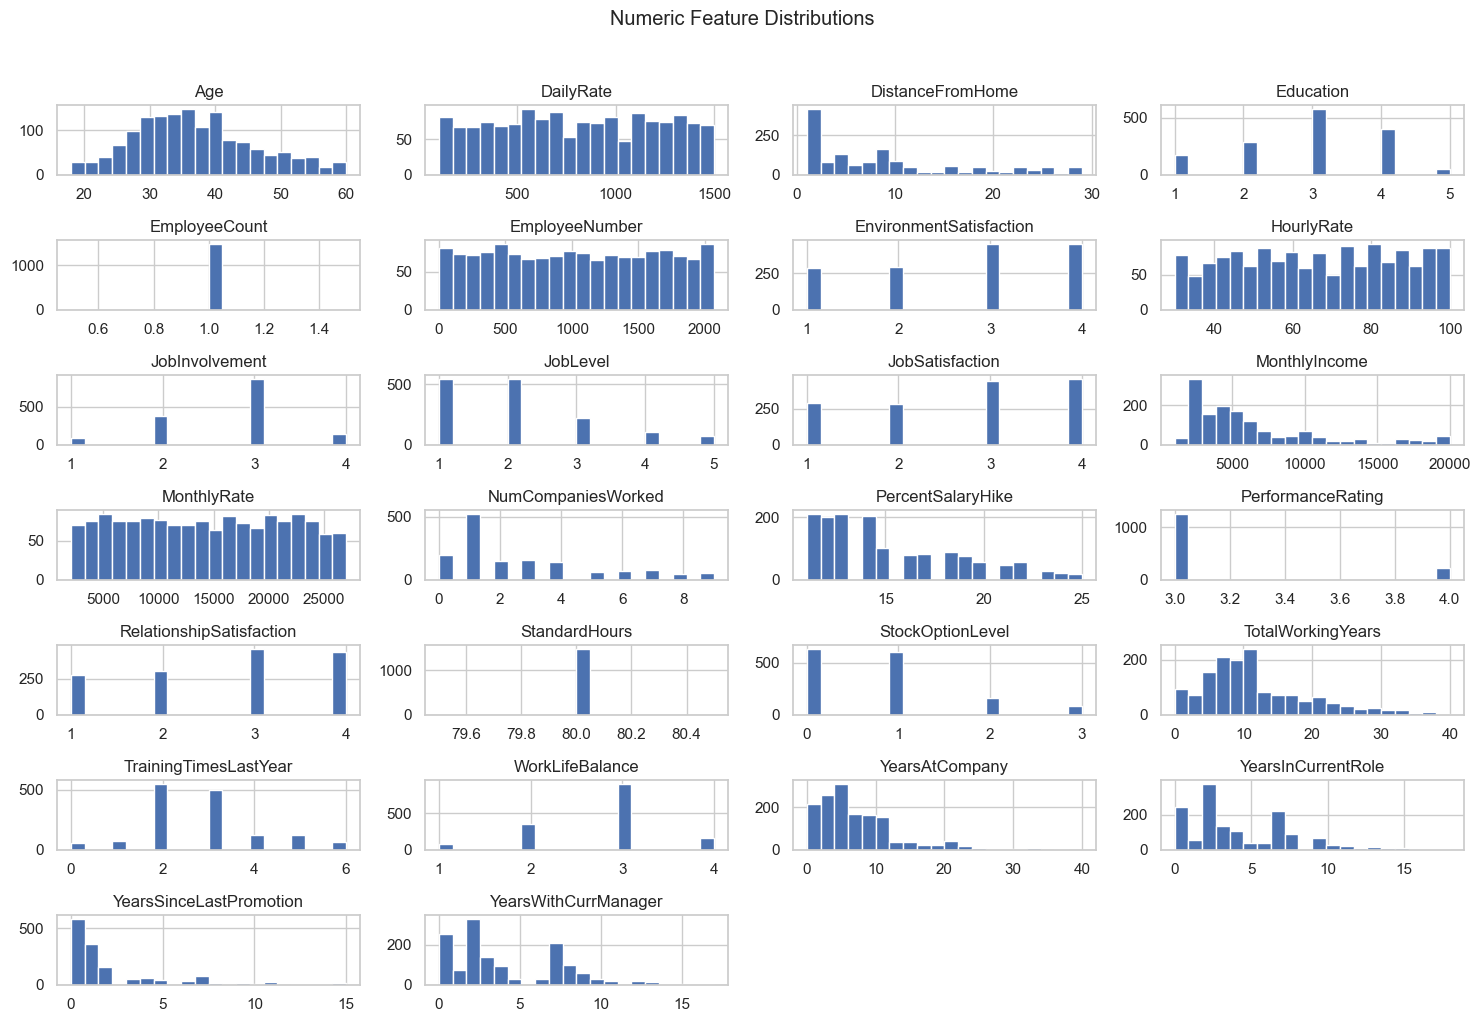

In [8]:
num_cols = df.select_dtypes(include="number").columns

df[num_cols].hist(figsize=(15,10), bins=20, layout=(len(num_cols)//4 + 1, 4))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()

plt.savefig(FIG_DIR / "eda_numeric_histograms.png")
plt.show()
plt.close()


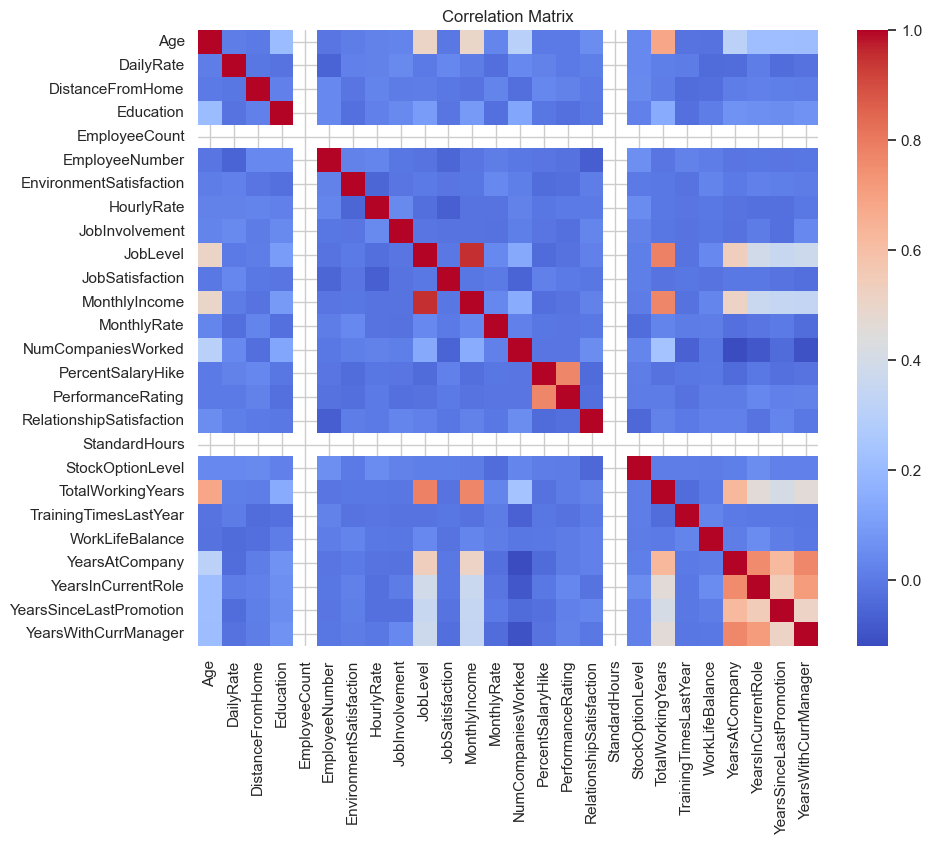

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

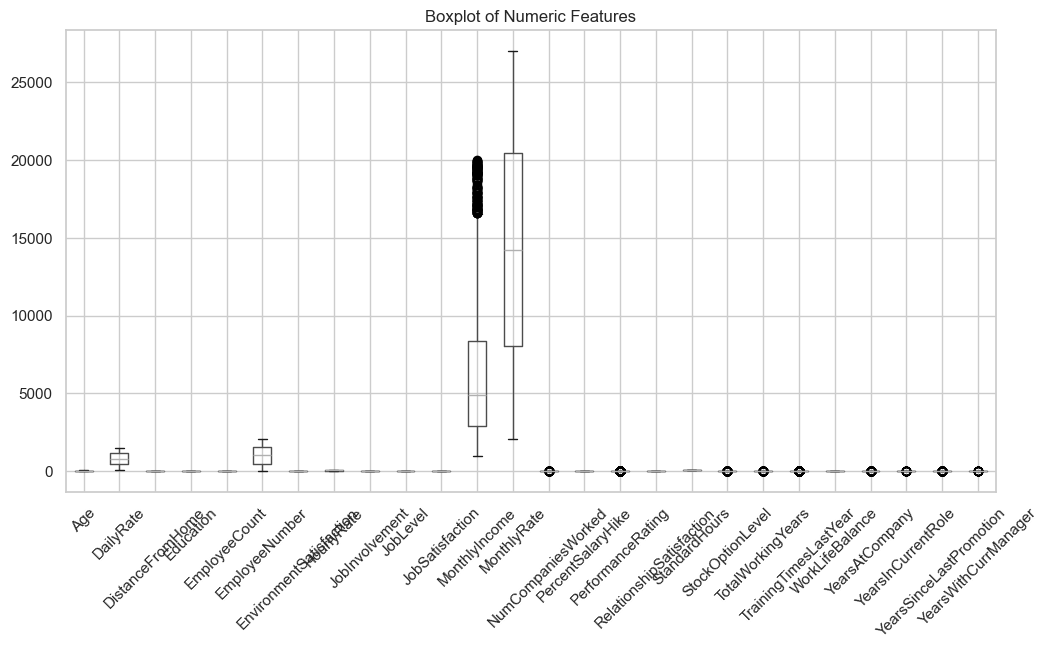

In [10]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].boxplot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()


In [11]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 7


In [12]:
import numpy as np

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))).sum()
    print(f"{col}: {outliers} outliers")


Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EmployeeNumber: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 227 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 240 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 105 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 108 outliers
YearsWithCurrManager: 13 outliers


### Nhận xét EDA

**1. Phân bố Attrition**
- Tỷ lệ nhân viên nghỉ việc (Attrition = Yes) thấp hơn nhóm ở lại.
- Dữ liệu có dấu hiệu mất cân bằng lớp nhẹ, cần lưu ý khi huấn luyện mô hình.

**2. Phân bố các biến số**
- Các biến như MonthlyIncome, TotalWorkingYears, YearsAtCompany có phân bố lệch phải.
- Một số nhân viên có thu nhập rất cao tạo ra outlier.

**3. Ma trận tương quan**
- MonthlyIncome có tương quan dương với TotalWorkingYears và JobLevel.
→ Nhân viên có thâm niên và cấp bậc cao thường có thu nhập cao hơn.
- Không có cặp biến nào tương quan quá cao → nguy cơ đa cộng tuyến thấp.

**4. Phát hiện outlier**
- Một số biến như MonthlyIncome, TotalWorkingYears, YearsAtCompany có nhiều outlier theo IQR.
- Cần xử lý outlier trong bước tiền xử lý để tránh ảnh hưởng mô hình.

**5. Duplicate**
- Số bản ghi trùng lặp: (ghi số thực tế từ notebook).
- Nếu có duplicate cần loại bỏ trong bước preprocessing.

**Kết luận EDA**
- Dữ liệu tương đối sạch, ít missing.
- Có mất cân bằng lớp nhẹ.
- Có outlier ở một số biến số.
→ Cần thực hiện:
- Xử lý outlier
- Chuẩn hoá dữ liệu
- Kiểm tra mất cân bằng lớp khi huấn luyện
